In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

---

## EDA: Exploratory Data Analysis

- Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods __[(source)](https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods.)__. Introductory EDA helps determine how to comprehend data sources to discover patterns, spot anomalies, test hypotheses, verify assumptions, and determine which statistical techniques are most appropriate for modeling. 
- With respect to this dataset, various visuals have been created including:
> 1. Univariate visualizations of each field in the raw dataset
>    - Graphical Examples: violin plots, historgrams
>    - Nongraphical Example: summary statistics
> 3. Bivariate visualizatons to assess relationshps of each variable to the target variable, holding all else constant
>    - Example: correlation matrices
> 5. Multivariate visualizations for mapping and understanding interactions between different fields in the data.
>    - Examples: ridgeline charts, bubble plots, slope charts

In [321]:
df = pd.read_csv('../data/df.csv')

In [69]:
print(f'The shape of the imported wine dataframe before cleaning is {df.shape}.')

The shape of the imported wine dataframe before cleaning is (300, 10).


In [71]:
# Checking for duplicates
df.nunique()
# Here we see that there are 300 rows but only 277 unique product_ids, therefore there are 23 duplicates.

product_id           277
wine_type             25
wine_name            277
wine_origin          110
rating_avg            19
rating_num            67
price_current         40
price_prediscount    102
discount_nom          30
savings_percent       39
dtype: int64

In [72]:
df.drop_duplicates(subset = "product_id", inplace = True)

In [73]:
print(f'The shape of the imported wine dataframe after cleaning is {df.shape}.')

The shape of the imported wine dataframe after cleaning is (277, 10).


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         277 non-null    int64  
 1   wine_type          277 non-null    object 
 2   wine_name          277 non-null    object 
 3   wine_origin        277 non-null    object 
 4   rating_avg         277 non-null    float64
 5   rating_num         277 non-null    int64  
 6   price_current      80 non-null     float64
 7   price_prediscount  277 non-null    object 
 8   discount_nom       80 non-null     object 
 9   savings_percent    80 non-null     float64
dtypes: float64(3), int64(2), object(5)
memory usage: 23.8+ KB


In [75]:
df.isnull().sum().sort_values(ascending = False)[lambda x: x>0]

price_current      197
discount_nom       197
savings_percent    197
dtype: int64

- 197 of the 277 data entries do not have a current price, nominal discount, or percent savings associated with their product. These nulls are inputed, as shown later with justifications.

In [225]:
df.describe().round(2)

,product_id,rating_avg,rating_num,price_current,savings_percent
count,277.00,277.00,277.00,80.00,80.00
mean,1069735.06,2.42,32.00,40.94,26.10
std,339852.09,2.15,137.74,77.96,17.82
min,75622.00,0.00,0.00,7.00,3.00
25%,877817.00,0.00,0.00,14.00,11.75
50%,1171412.00,3.70,7.00,19.00,19.50
75%,1308535.00,4.30,26.00,29.75,44.00
max,1530203.00,5.00,2064.00,549.00,59.00


In [77]:
df.head()

,product_id,wine_type,wine_name,wine_origin,rating_avg,rating_num,price_current,price_prediscount,discount_nom,savings_percent
0,1405250,Malbec,Chateau Du Caillau Cahors 2021,"Cahors, Southwest, France",5.0,19,15.0,39,$23.01,59.0
1,1358914,Tempranillo,Bodegas Lan D-12 2019,"Rioja, Spain",4.8,28,10.0,19,$2.01,15.0
2,1288787,Other Red Blends,Bodegas La Purisma Old Vines Red Blend 2019,"Yecla, Spain",4.3,61,22.0,13,$7.01,23.0
3,1301819,Tempranillo,Eguren Ugarte Cosecha 2021,"Rioja, Spain",4.6,27,11.0,10,$6.01,33.0
4,1384660,Gamay,Domaine Gilles Coperet Brouilly Saburin 2021,"Beaujolais, Burgundy, France",4.4,12,29.0,18,$5.01,14.0


---

### Violin Plots

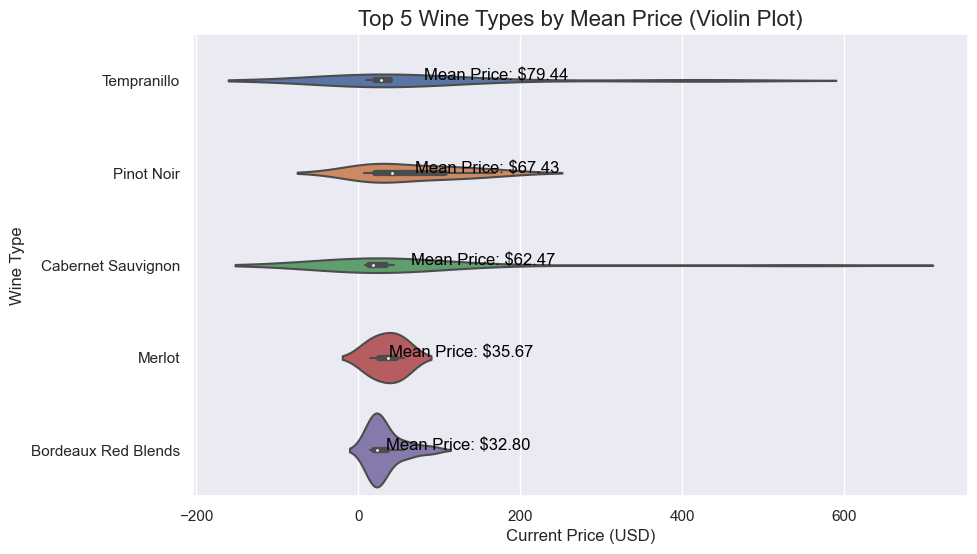

In [136]:
# Set a grey background
sns.set(style="darkgrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Get the top 5 wine types by mean price_current
top_wine_types = df.groupby("wine_type")["price_current"].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame to include only the top 5 wine types
filtered_df = df[df["wine_type"].isin(top_wine_types)]

# Violin Plot
ax = sns.violinplot(y=filtered_df["wine_type"], x=filtered_df["price_current"], order=top_wine_types)

# Add mean price annotations
for i, group in enumerate(top_wine_types):
    mean_price = filtered_df[filtered_df["wine_type"] == group]["price_current"].mean()
    ax.text(mean_price + 2, i, f'Mean Price: ${mean_price:.2f}', fontsize=12, color='black')

# Set title and axes
plt.title("Top 5 Wine Types by Mean Price (Violin Plot)", fontsize = 16)
plt.xlabel("Current Price (USD)")
plt.ylabel("Wine Type")

# Show the plot
plt.show()

<b>Analysis of Violin Plots: </b>
- By mean pricing, the five most expensive wine types are tempranillos, pinot noirs, cabernet sauvignons, merlots, and bordeaux red blends, respectively.
- The Cabernet Sauvignons and Tempranillos have the most extreme outliers. The merlots most resemble a normal distribution, while the other four types show normal distributions with positive (rightward) skew of varying magnitudes.
- The pinot noirs have the largest interquartile range (IQR) and largest 1.5x IQR, as evidenced by the thick gray bar and the adjacent thinner gray bar in the center of its plot, respectively. 

### Histogram

In [122]:
# Previewing the histogram data using bins:

# Define the bin edges
bin_edges = [0, 1, 2, 3, 4, 5]

# Create bins for 'rating_avg'
df['rating_bin'] = pd.cut(df['rating_avg'], bins=bin_edges, right=False)

# Group by 'rating_bin' and count the entries in each bin
rating_counts = df.groupby('rating_bin').size().reset_index(name='count')

# Rename the 'rating_bin' column for clarity
rating_counts['rating_range'] = rating_counts['rating_bin'].astype(str)

rating_counts[['rating_range', 'count']]

,rating_range,count
0,"[0, 1)",120
1,"[1, 2)",0
2,"[2, 3)",0
3,"[3, 4)",46
4,"[4, 5)",85


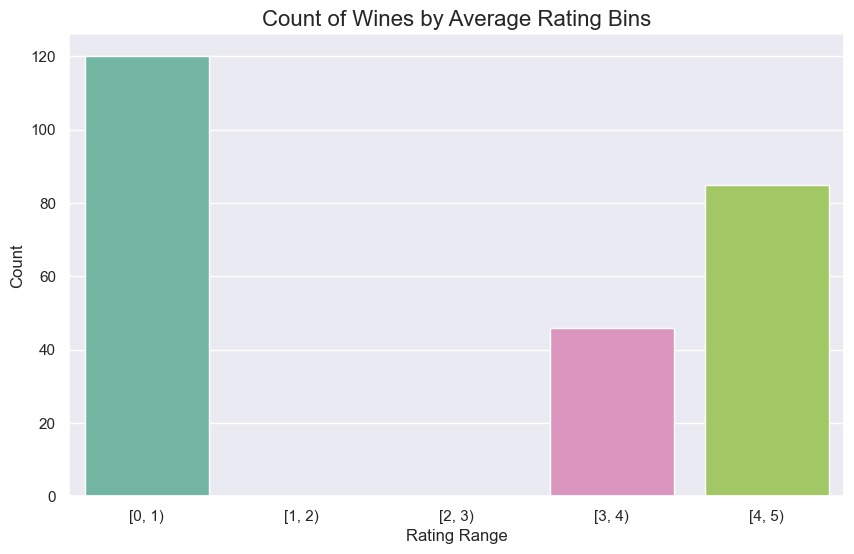

In [134]:
# Set color palette
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))

# Create a bar chart
sns.barplot(x='rating_range', y='count', data=rating_counts)

# Set title and labels
plt.title("Count of Wines by Average Rating Bins", fontsize=16)
plt.xlabel("Rating Range")
plt.ylabel("Count")

plt.show()

<b>Analysis of Histogram: </b>

- Wine.com's user interface allows individuals to rate wine on a discrete scale from 0 to 5 (inclusive). The average rating per wine is then computed on a continuous interval between 0 and 5. The histogram above shows bins which are inclusive of the leftmost digit and exclusive of the rightmost digit, as indicated by the bracket and parenthesis, respectively. 
- All wines that are not rated by individuals default to a value of 0.
- The 120 bottles with a 0 rating are most likely due to their lack of rating. The histogram also shows 46 wines rated between [3,4) and 85 wines rated between [4,5) but no wines rated between [1, 3). The absence of average ratings between 1 and 3 in this dataset could be attributed to a common user behavior where individuals tend to either rate wines very positively (above 3) or not provide a rating at all (0). This pattern may suggest that users who are satisfied with a wine are more likely to take the time to rate it, while those who are dissatisfied might simply choose not to rate it, resulting in a skewed distribution towards higher ratings and a lack of ratings in the 1 to 3 range.

### Ridgeline Chart

In [221]:
df['wine_type'].nunique()

25

<Figure size 2500x2500 with 0 Axes>

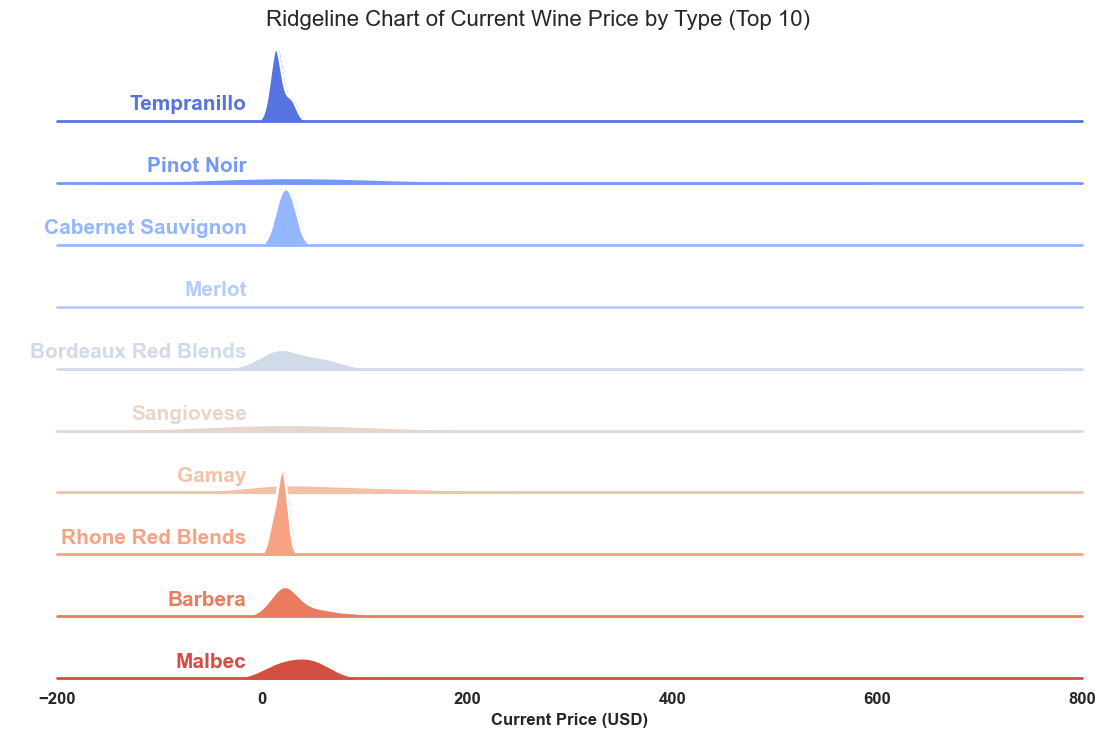

In [230]:
# Get the top 10 wine types by mean price_current
top_wine_types = df.groupby("wine_type")["price_current"].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 wine types
filtered_df = df[df["wine_type"].isin(top_wine_types)]

# Set figure size
plt.figure(figsize=(25, 25))

# Set the white theme with a dark background
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Generate a color palette
pal = sns.color_palette(palette='coolwarm', n_colors=10)

# Create a FacetGrid
g = sns.FacetGrid(filtered_df, row='wine_type', hue='wine_type', aspect=15, height=0.75, palette=pal)

# Map kdeplots to visualize the ridgeline and remove outliers beyond 2 SDs
g.map(sns.kdeplot, 'price_current', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5, cut=2)

# Add white lines representing the contour of each kdeplot
g.map(sns.kdeplot, 'price_current', bw_adjust=1, clip_on=False, color="w", lw=2)

# Add horizontal lines for each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Loop over the FacetGrid figure axes and add wine type labels with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, top_wine_types[i], fontweight='bold', fontsize=15, ha='right', va='top', color=pal[i])

# Adjust subplots overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove axes labels, yticks, and spines
g.set(ylabel='')
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Remove central row labels
g.set_titles("")

# Set the x-axis limits to the desired range
plt.xlim(-200, 800)  # Adjust the limits as needed

# Title and Labels
plt.setp(ax.get_xticklabels(), fontsize=12, fontweight='bold')
plt.xlabel('Current Price (USD)', fontweight='bold', fontsize=12)
g.fig.suptitle('Ridgeline Chart of Current Wine Price by Type (Top 10)', ha='center', fontsize=16, fontweight=20)

# Show the plot
plt.show(); # Semi-colon suppression for figsize display does not apply to ridgeline charts

<b>Analysis of Ridgeline Chart: </b>

- This ridgeline chart displays multiple histograms for the top 10 wine types by mean price, allowing for a visual comparison of their price distributions. Each wine type is represented as a separate row in the chart, making it easy to observe variations in price distributions among the types.
- Tempranillo has and Rhone Red Blends have the most concentraiton within 1 standard devition of their means, while pinot noirs, Sangioveses, and Gamays have a much wider distrubtion. This indicaes that the price of the former are difficult to predict by type alone, and that other factors (such as perhaps age, quality, location) influence its pricing structure). 

### Partial Pairplot

In [248]:
# Note 2
# If title doesnt generate correctly, just remove line of code

<Figure size 1000x600 with 0 Axes>

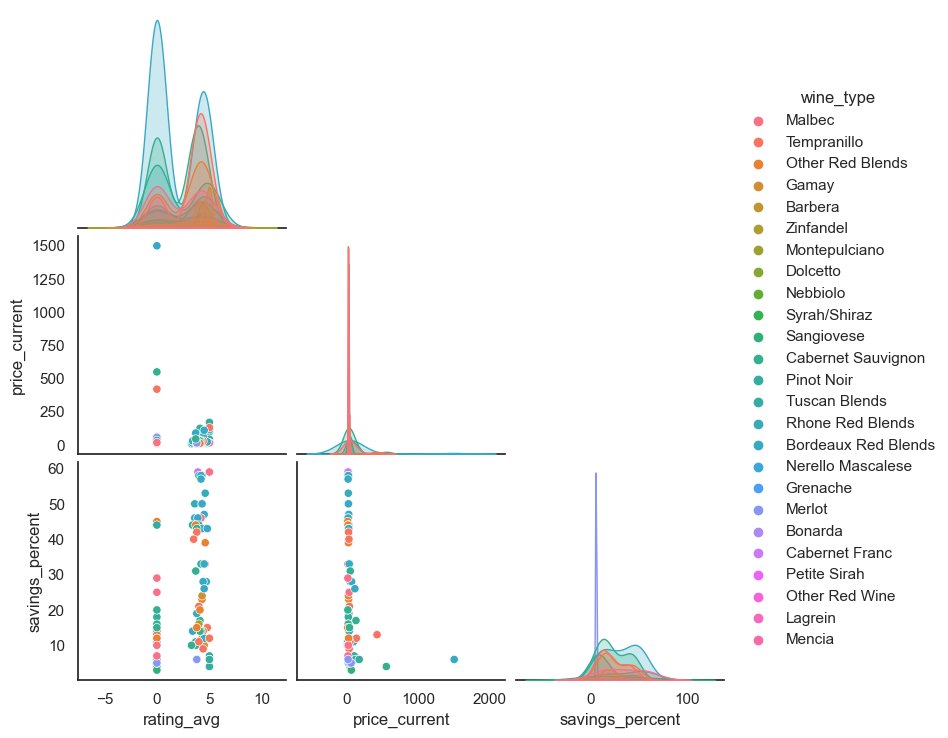

In [322]:
# Set figure size
plt.figure(figsize=(10, 6))

# Partial pairplot
sns.pairplot(df, hue="wine_type", vars=["rating_avg", "price_current", "savings_percent"], corner = True)

# Set title and labels
# plt.title("Partial Pairplot of Wine Data", fontsize = 16, loc = 'center', pad = 0)

# Show the plot
plt.show()

<b>Analysis of Partial Pairplot: </b>
- Using a hue of ```df['wine_type']```, the partial pairplot shows correlations bwtween current price and average rating, current price and percent savings, and average rating and percent savings.
- Key takeways here include that among wine types, merlot has the least distributed percent savings, indicating that the prices of merlots are relatively fixed. When examining the first column of p,ots showing average rating, most unrated wines (wines with a score of 0) are tempranillos, Sangioveses, and Tuscan blends, among others.